In [1]:
from deepRadarModelModConv_Ka_trained import *

2022-02-23 10:57:14.810288: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-23 10:57:14.810327: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-02-23 10:57:16.473383: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-23 10:57:16.473403: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-23 10:57:16.473419: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (alien): /proc/driver/nvidia/version does not exist
2022-02-23 10:57:16.473593: I tensorflow/core/platform/cpu_feature_guar

In [2]:
yp=model(x_test[:,-60:])
         
yp=yp.numpy()[:,0]*yp.numpy()[:,1]
y_testp=y_test[:,0]*piaKu[ind_test]
stats1=[]
for intv in [[1,2],[2,4],[4,6],[6,8],[8,10],[10,20]]:
    a=np.nonzero((y_testp-intv[0])*(y_testp-intv[1])<0)
    rms=(((yp[a[0]]-y_testp[a[0]])**2).mean())**0.5/y_testp[a[0]].mean()
    #print("%6.2f %6.2f %6.2f %6.2f"%(intv[0],intv[1],\
    #                                 (-1+yp[a[0]].mean()/y_testp[a[0]].mean())*100,rms*100))
    stats1.append([intv[0],intv[1],\
                                     (-1+yp[a[0]].mean()/y_testp[a[0]].mean())*100,rms*100])
stats2=[]
yp_2=model(x_test[:,-40:])
yp=yp_2.numpy()[:,0]*piaKu[ind_test]
piaP=yp_2.numpy()[:,1]
y_testp=y_test[:,0]*piaKu[ind_test]
for intv in [[1,2],[2,4],[4,6],[6,8],[8,10],[10,20]]:
    a=np.nonzero((y_testp-intv[0])*(y_testp-intv[1])<0)
    rms=(((yp[a[0]]-y_testp[a[0]])**2).mean())**0.5/y_testp[a[0]].mean()
    #print("%6.2f %6.2f %6.2f %6.2f %6.2f %6.2f"%(intv[0],intv[1],\
    #                                             (-1+yp[a[0]].mean()/y_testp[a[0]].mean())*100,rms*100,\
    #                                             piaP[a[0]].mean(),piaKu[ind_test][a].mean()))
    stats2.append([intv[0],intv[1],(-1+yp[a[0]].mean()/y_testp[a[0]].mean())*100,rms*100,\
                   piaP[a[0]].mean(),piaKu[ind_test][a].mean()])
stats1=np.array(stats1)
stats2=np.array(stats2)

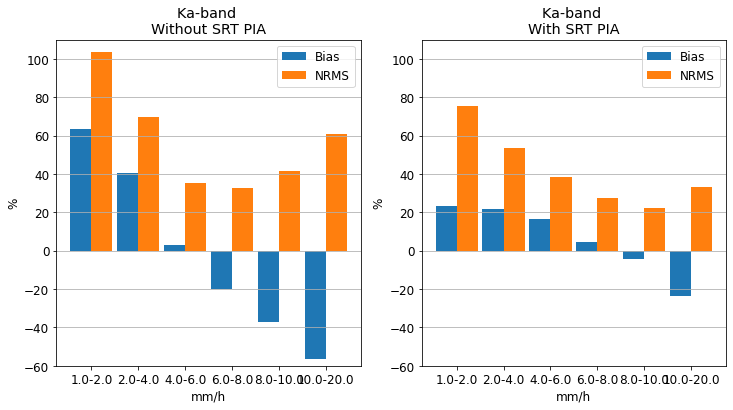

In [3]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.bar(np.arange(6)-0.225,stats1[:6,2],0.45,label='Bias')
plt.bar(np.arange(6)+0.225,stats1[:6,3],0.45,label='NRMS')
plt.xticks(range(6),('1.0-2.0','2.0-4.0','4.0-6.0','6.0-8.0','8.0-10.0','10.0-20.0'))
plt.ylabel('%')
plt.legend()
plt.gca().yaxis.grid()
plt.title("Ka-band \nWithout SRT PIA")
plt.xlabel('mm/h')
plt.ylim(-60,110)
#plt.figure(figsize=(6,6))
plt.subplot(122)
plt.bar(np.arange(6)-0.225,stats2[:6,2],0.45,label='Bias')
plt.bar(np.arange(6)+0.225,stats2[:6,3],0.45,label='NRMS')
plt.xticks(range(6),('1.0-2.0','2.0-4.0','4.0-6.0','6.0-8.0','8.0-10.0','10.0-20.0'))
plt.ylabel('%')
plt.legend()
plt.gca().yaxis.grid()
plt.title("Ka-band \nWith SRT PIA")
plt.ylim(-60,110)
plt.xlabel('mm/h')
plt.savefig("kaBand_polar_GPM_assessment.png")